# Artificial and Computational Intelligence

## Problem statement 3 : Gaming

**Implement a Two-Player Connect Four Game with Fixed Depth Minimax**

a. You are free to choose your own static evaluation function. Justify your choice of static evaluation value design and explain with a sample game state. Do not use any machine learning model for the evaluation function.

b. In the Connect Four game, one player must be a human and provide dynamic inputs during gameplay. The other player will be simulated by the program using the Minimax algorithm with a fixed depth. The game should alternate turns between the human player and the computer, displaying the updated game state after each move.

c. Implement Python code for the design under part a, using Minimax Algorithm.

Enter column (0-5): 5


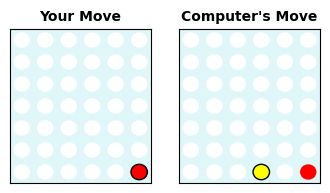


Game interrupted. Exiting gracefully...


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Constants for board size and players
ROWS = 7
COLS = 6
PLAYER = 1
AI = 2
depth_limit = 3


def create_board():
    """Creates an empty Connect Four board."""
    return np.zeros((ROWS, COLS), dtype=int)


def is_valid_location(board, col):
    """Checks if the selected column is a valid move."""
    return board[0][col] == 0


def get_next_open_row(board, col):
    """Finds the next available row in the selected column."""
    for r in range(ROWS - 1, -1, -1):
        if board[r][col] == 0:
            return r


def drop_piece(board, row, col, piece):
    """Places a piece (Player or AI) in the given column and row."""
    board[row][col] = piece


def winning_move(board, piece):
    """Checks if the given player has won the game."""
    for r in range(ROWS):
        for c in range(COLS - 3):
            if np.all(board[r, c:c + 4] == piece):
                return True

    for r in range(ROWS - 3):
        for c in range(COLS):
            if np.all(board[r:r + 4, c] == piece):
                return True

    for r in range(ROWS - 3):
        for c in range(COLS - 3):
            if all(board[r + i][c + i] == piece for i in range(4)):
                return True

    for r in range(3, ROWS):
        for c in range(COLS - 3):
            if all(board[r - i][c + i] == piece for i in range(4)):
                return True

    return False


def score_window(window, piece):
    """Evaluates a window of four spaces for a given player."""
    score = 0
    opp_piece = PLAYER if piece == AI else AI

    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(0) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(0) == 2:
        score += 2

    if window.count(opp_piece) == 3 and window.count(0) == 1:
        score -= 4  # Block the opponent from winning

    return score


def evaluate_board(board):
    """Static evaluation function for board state."""
    score = 0

    # Score center column
    center_array = [int(i) for i in list(board[:, COLS // 2])]
    center_count = center_array.count(AI)
    score += center_count * 3

    # Score horizontal, vertical, and diagonal patterns
    for r in range(ROWS):
        for c in range(COLS - 3):
            window = list(board[r, c:c + 4])
            score += score_window(window, AI)

    for r in range(ROWS - 3):
        for c in range(COLS):
            window = [board[r + i][c] for i in range(4)]
            score += score_window(window, AI)

    for r in range(ROWS - 3):
        for c in range(COLS - 3):
            window = [board[r + i][c + i] for i in range(4)]
            score += score_window(window, AI)

    for r in range(3, ROWS):
        for c in range(COLS - 3):
            window = [board[r - i][c + i] for i in range(4)]
            score += score_window(window, AI)

    return score


def minimax(board, depth, maximizingPlayer):
    """Minimax algorithm with evaluation function."""
    valid_locations = [c for c in range(COLS) if is_valid_location(board, c)]
    is_terminal = winning_move(board, PLAYER) or winning_move(board, AI) or len(valid_locations) == 0

    if depth == 0 or is_terminal:
        if winning_move(board, AI):
            return (None, 1000000)
        elif winning_move(board, PLAYER):
            return (None, -1000000)
        elif len(valid_locations) == 0:
            return (None, 0)
        else:
            return (None, evaluate_board(board))

    if maximizingPlayer:
        value = -np.inf
        best_col = random.choice(valid_locations)
        for col in valid_locations:
            temp_board = board.copy()
            row = get_next_open_row(temp_board, col)
            drop_piece(temp_board, row, col, AI)
            new_score = minimax(temp_board, depth - 1, False)[1]
            if new_score > value:
                value = new_score
                best_col = col
        return best_col, value
    else:
        value = np.inf
        best_col = random.choice(valid_locations)
        for col in valid_locations:
            temp_board = board.copy()
            row = get_next_open_row(temp_board, col)
            drop_piece(temp_board, row, col, PLAYER)
            new_score = minimax(temp_board, depth - 1, True)[1]
            if new_score < value:
                value = new_score
                best_col = col
        return best_col, value

def draw_boards(player_board, ai_board, last_player_move, last_ai_move):
    """Draws the player's move and AI's move side by side for comparison."""
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))  # Side-by-side display
    titles = ["Your Move", "Computer's Move"]
    boards = [player_board, ai_board]
    last_moves = [last_player_move, last_ai_move]

    for ax, board, title, last_move in zip(axes, boards, titles, last_moves):
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(-0.5, COLS - 0.5)
        ax.set_ylim(-0.5, ROWS - 0.5)
        ax.set_facecolor('#E0F7FA')  # Lighter background for clarity
        ax.set_title(title, fontsize=10, fontweight='bold', color='black')

        # Draw each slot as a circle
        for r in range(ROWS):
            for c in range(COLS):
                color = 'white'  # Default empty slot color
                edge_color = 'none'  # Default no border
                edge_width = 0  # Default no border width
                if board[r][c] == PLAYER:
                    color = 'red'
                    if last_move == (r, c):
                        edge_color = 'black'  # Highlight latest move
                        edge_width = 1
                elif board[r][c] == AI:
                    color = 'yellow'
                    if last_move == (r, c):
                        edge_color = 'black'  # Highlight latest move
                        edge_width = 1  # Thinner border
                circle = patches.Circle((c, ROWS - 1 - r), 0.35, edgecolor=edge_color, facecolor=color, linewidth=edge_width)
                ax.add_patch(circle)

    plt.show()

def play_game():
    """Runs the main game loop for Connect Four."""
    board = create_board()
    game_over = False
    turn = PLAYER  # Start with player always
    last_player_move = None
    last_ai_move = None

    try:
      while not game_over:
          if turn == PLAYER:
              col = input("Enter column (0-5): ").strip()[:1]  # Compact input field
              if col.isdigit() and 0 <= int(col) <= 6:
                  col = int(col)
                  if is_valid_location(board, col):
                      row = get_next_open_row(board, col)
                      drop_piece(board, row, col, PLAYER)
                      last_player_move = (row, col)

                      if winning_move(board, PLAYER):
                          print("Congratulations! You win!")
                          draw_boards(board, board, last_player_move, last_ai_move)
                          game_over = True
                          break
                  else:
                      print("Column is full. Try another one.")
                      continue
              else:
                  print("Invalid input. Please enter a number between 0-6.")
                  continue

              turn = AI  # Switch to AI's turn

          else:
              temp_board = board.copy()
              col, _ = minimax(board, depth_limit, True)
              row = get_next_open_row(board, col)
              drop_piece(board, row, col, AI)
              last_ai_move = (row, col)
              draw_boards(temp_board, board, last_player_move, last_ai_move)

              if winning_move(board, AI):
                  print("Computer wins! Better luck next time!")
                  draw_boards(board, board, last_player_move, last_ai_move)
                  game_over = True
                  break

              turn = PLAYER  # Switch back to player's turn
    except KeyboardInterrupt:
        print("\nGame interrupted. Exiting gracefully...")

if __name__ == "__main__":
    play_game()